In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data=pd.read_csv("C:\\Users\\ushak\\Desktop\\Internsavy\\Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data=data.set_index('CustomerID')

In [4]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
data.dtypes

Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
data.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
features = ['Genre','Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]


In [9]:
X_encoded = pd.get_dummies(X, columns=['Genre'], drop_first=True)

In [10]:
scaler = StandardScaler()

In [11]:
columns_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [12]:
X_encoded[columns_to_scale] = scaler.fit_transform(X_encoded[columns_to_scale])

In [13]:
X_encoded

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
CustomerID,,,,
1,-1.424569,-1.738999,-0.434801,1
2,-1.281035,-1.738999,1.195704,1
3,-1.352802,-1.700830,-1.715913,0
4,-1.137502,-1.700830,1.040418,0
5,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
196,-0.276302,2.268791,1.118061,0
197,0.441365,2.497807,-0.861839,0
198,-0.491602,2.497807,0.923953,1


C:\Users\ushak\programming\New folder\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


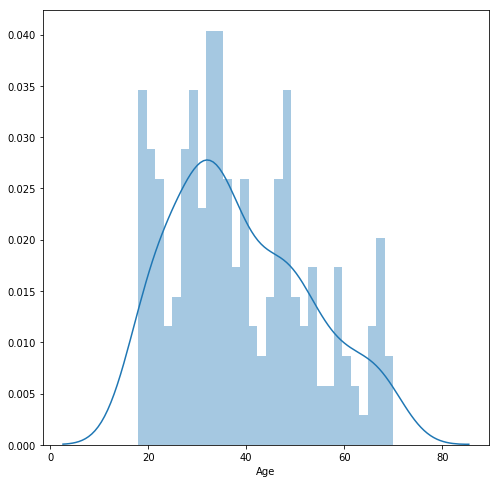

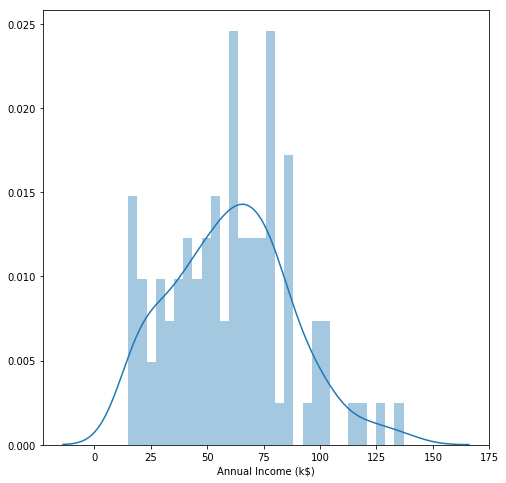

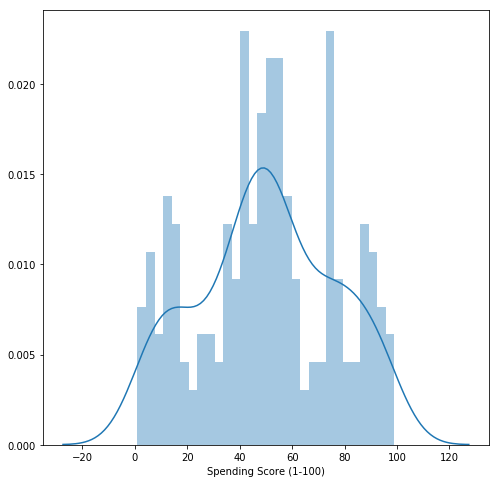

In [14]:
for col in columns_to_scale:
    plt.figure(figsize = (8, 8))
    sns.distplot(data[col],bins=30)
    plt.show()

# KMeans Clustering

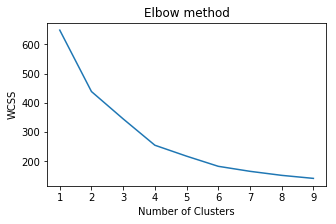

In [15]:
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_encoded) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]
plt.figure(figsize=(5,3))
plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

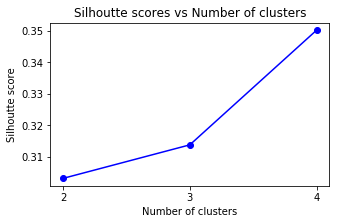

In [16]:
silhoutte_scores = [silhouette_score(X_encoded, model.labels_) for model in kmeans_models[1:4]]
plt.figure(figsize=(5,3))
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_encoded)

segments = kmeans.predict(X_encoded)
X_encoded['Segment'] = segments

In [18]:
X_encoded

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,Segment
CustomerID,,,,,
1,-1.424569,-1.738999,-0.434801,1,1
2,-1.281035,-1.738999,1.195704,1,1
3,-1.352802,-1.700830,-1.715913,0,1
4,-1.137502,-1.700830,1.040418,0,1
5,-0.563369,-1.662660,-0.395980,0,1
...,...,...,...,...,...
196,-0.276302,2.268791,1.118061,0,0
197,0.441365,2.497807,-0.861839,0,2
198,-0.491602,2.497807,0.923953,1,0


In [19]:
X_encoded['Segment'].nunique()

3

In [20]:
cluster_counts = X_encoded['Segment'].value_counts()
print(cluster_counts)

2    91
1    68
0    41
Name: Segment, dtype: int64


In [21]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_encoded.drop('Segment', axis=1), segments)
feature_importances = rf.feature_importances_

In [22]:
feature_importances

array([0.53008115, 0.24655973, 0.21900423, 0.00435489])

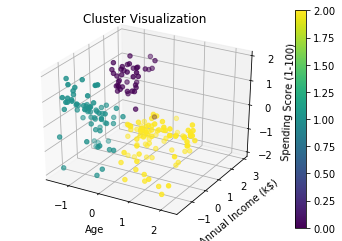

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_encoded['Age'], X_encoded['Annual Income (k$)'], X_encoded['Spending Score (1-100)'], c=X_encoded['Segment'], cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Cluster Visualization')

plt.colorbar(scatter)

plt.show()


# DBSCAN

In [24]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)

dbscan.fit(X_encoded.drop('Segment', axis=1))

labels = dbscan.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0) 
print("Cluster Labels:", labels)
print("Number of Clusters:", n_clusters)



Cluster Labels: [-1 -1 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  1 -1  1 -1 -1 -1  1 -1  1
 -1  1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1  2  3
  3  3  2 -1  3  4  2  4  2  4  3  4  4 -1 -1  2  4 -1  2 -1 -1  3  4  2
 -1  2  4  5  2 -1  3  2  4 -1  4  2  3  4  2  3 -1  2 -1  5  4 -1  3  5
  2  3  4  5  3  2  6  5  4  3 -1  4  6  6  6  3 -1  5  3  3 -1  2  2  2
  5 -1 -1  8 -1  7 -1  8 -1 -1 -1 -1  3  7 -1  7 -1 -1 -1  7 -1  8 -1  7
 -1 -1 -1  7 -1  8 -1  8 -1  7 -1  7 -1  7 -1  7 -1  7 -1  7 -1  7 -1  7
 -1 -1 -1 -1 -1  8 -1  7 -1 -1 -1 -1 -1  7 -1  7 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
Number of Clusters: 9


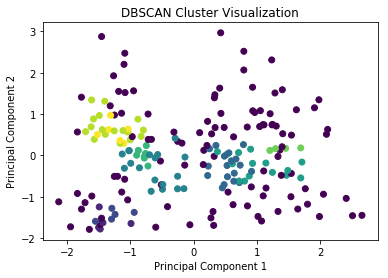

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded.drop('Segment', axis=1))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


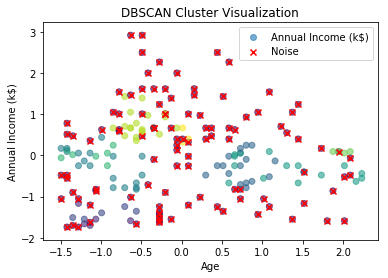

In [26]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X_encoded['Age'], X_encoded['Annual Income (k$)'], c=labels, cmap='viridis', marker='o', alpha=0.6)
plt.scatter(X_encoded['Age'][labels == -1], X_encoded['Annual Income (k$)'][labels == -1], color='red', marker='x', label='Noise')
plt.title('DBSCAN Cluster Visualization')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()
